In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import scipy
import statsmodels.api as sm
pd.options.display.precision = 2

%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
sns.set_context('talk')
plt.style.use('dark_background')
plt.figure(figsize=(15,10))
sns.set_palette("pastel")

<Figure size 1080x720 with 0 Axes>

In [8]:
df = pd.read_csv('./data4a.csv')
df.head()

,N,y,x,f
0,8,1,9.76,C
1,8,6,10.48,C
2,8,5,10.83,C
3,8,6,10.94,C
4,8,1,9.37,C


## 6.2 例題: 上限のあるカウントデータ

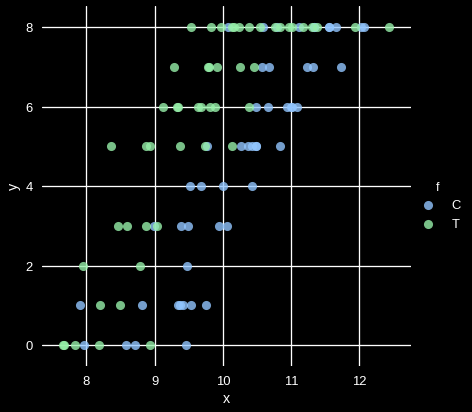

In [11]:
sns.lmplot(x='x', y='y', data=df, hue='f', size=6, fit_reg=False)

In [12]:
df.describe()

,N,y,x
count,100.0,100.00,100.00
mean,8.0,5.08,9.97
std,0.0,2.74,1.09
min,8.0,0.00,7.66
25%,8.0,3.00,9.34
50%,8.0,6.00,9.96
75%,8.0,8.00,10.77
max,8.0,8.00,12.44


In [13]:
df['f'].value_counts()

T    50
C    50
Name: f, dtype: int64

In [14]:
df['f'] = df['f'].map(lambda x: 0 if x=='C' else 1)
df['Intercept'] = 1.0
df['N-y'] = df['N'] - df['y']

In [15]:
df['f'].value_counts()

1    50
0    50
Name: f, dtype: int64

In [16]:
df.head()

,N,y,x,f,Intercept,N-y
0,8,1,9.76,0,1.0,7
1,8,6,10.48,0,1.0,2
2,8,5,10.83,0,1.0,3
3,8,6,10.94,0,1.0,2
4,8,1,9.37,0,1.0,7


## 6.4 ロジスティック回帰とロジットリンク関数

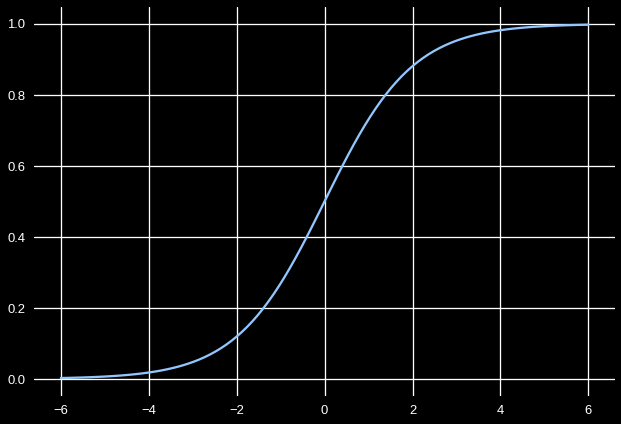

In [17]:
z = np.linspace(-6.0, 6.0, 100)
q = 1 / (1 + np.exp(-z))
plt.plot(z, q)

In [18]:
z = lambda b1, b2, x: b1 + b2 * x 

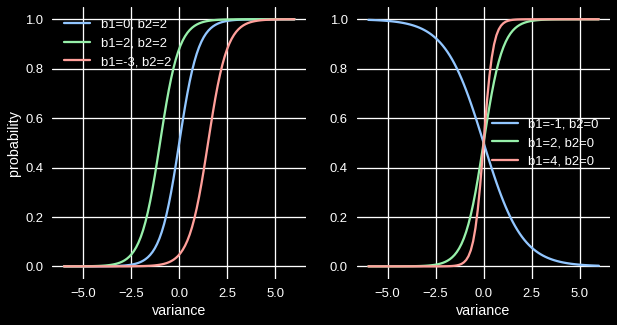

In [19]:
x = np.linspace(-6.0, 6.0, 100)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(x, 1 / (1 + np.exp(-z(0, 2, x))), label='b1=0, b2=2')
plt.plot(x, 1 / (1 + np.exp(-z(2, 2, x))), label='b1=2, b2=2')
plt.plot(x, 1 / (1 + np.exp(-z(-3, 2, x))), label='b1=-3, b2=2')
plt.xlabel('variance')
plt.ylabel('probability')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, 1 / (1 + np.exp(-z(0, -1, x))), label='b1=-1, b2=0')
plt.plot(x, 1 / (1 + np.exp(-z(0, 2, x))), label='b1=2, b2=0')
plt.plot(x, 1 / (1 + np.exp(-z(0, 4, x))), label='b1=4, b2=0')
plt.xlabel('variance')
plt.legend()

In [36]:
# import statsmodels.formula.api as sm
glm = sm.GLM(endog=df[['y', 'N-y']], exog=df[['Intercept', 'x', 'f']], family=sm.families.Binomial())
fit = glm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           ['y', 'N-y']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -133.11
Date:                Fri, 21 Sep 2018   Deviance:                       123.03
Time:                        19:58:12   Pearson chi2:                     13.7
No. Iterations:                     6                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.5361      1.414    -13.818      0.000     -22.307     -16.765
x              1.9524      0.139     14.059      0.000       1.680       2.225
f              2.0215      0.231      8.740      0.000       1.568       2.475
==============================================================================
"""

In [37]:
fit.params[1]

1.9524063613544083

In [38]:
b0 = fit.params[0]
b1 = fit.params[1]
b2 = fit.params[2]

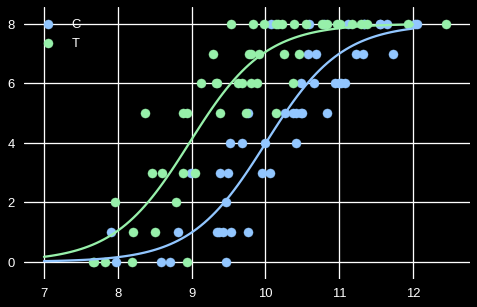

In [39]:
plt.figure(figsize=(8,5))
x = np.linspace(7.0, 12.0, 100)
z1 = b0 + b1 * x + b2 * 0
plt.plot(x, 1 / (1 + np.exp(-z1)) * 8)
z1 = b0 + b1 * x + b2 * 1
plt.plot(x, 1 / (1 + np.exp(-z1)) * 8)
plt.scatter(df.x[df.f == 0], df.y[df.f == 0], label = 'C')
plt.scatter(df.x[df.f == 1], df.y[df.f == 1], label = 'T')
plt.legend()

In [23]:
x = [8.5, 10, 12]
y = np.linspace(0,8,9)

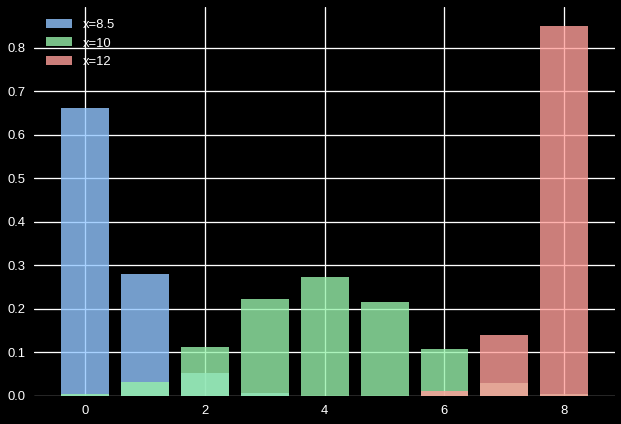

In [24]:
from scipy.stats import binom
for i in range(len(x)):
    z = fit.params[0] + fit.params[1] * x[i] + fit.params[2] * 0
    q = 1 / (1 + np.exp(-z))
    plt.bar(y, binom.pmf(y, 8, q), alpha=0.8, label = 'x={}'.format(x[i]))
    plt.legend()

In [25]:
glm, fit, AIC, L, deviance, res_deviance = [], [], [], [], [], []
glm.append(sm.GLM(endog=df.loc[:,['y', 'N-y']], exog=df.loc[:,'Intercept'], family=sm.families.Binomial()))
glm.append(sm.GLM(endog=df.loc[:,['y', 'N-y']], exog=df.loc[:,['Intercept', 'f']], family=sm.families.Binomial()))
glm.append(sm.GLM(endog=df.loc[:,['y', 'N-y']], exog=df.loc[:,['Intercept', 'x']], family=sm.families.Binomial()))
glm.append(sm.GLM(endog=df.loc[:,['y', 'N-y']], exog=df.loc[:,['Intercept', 'x', 'f']], family=sm.families.Binomial()))

for i in range(len(glm)):
    fit.append(glm[i].fit())
    AIC.append(fit[i].aic)
    L.append(fit[i].llf)
    deviance.append(-2 * L[i])
    res_deviance.append(fit[i].deviance)

#full model

dpois = lambda x:scipy.stats.binom.logpmf(x, 8, x/8)
L.append(np.sum(dpois(df['y'])))
deviance.append(-2 * L[-1])
res_deviance.append(0.0)
AIC.append( deviance[-1] + 2 * len(df['y']) )

In [26]:
multi_glm_df = pd.DataFrame((np.c_[L, deviance, res_deviance, AIC]),
                            columns=('L', 'deviance', 'res deviance', 'AIC'),
                            index=('一定', 'f', 'x', 'x + f', 'full'))

In [27]:
round(multi_glm_df,1)

,L,deviance,res deviance,AIC
一定,-321.2,642.4,499.2,644.4
f,-316.9,633.8,490.6,637.8
x,-180.2,360.3,217.2,364.3
x + f,-133.1,266.2,123.0,272.2
full,-71.6,143.2,0.0,343.2


## 交互作用項の入った線形予測子

In [29]:
df.head()

,N,y,x,f,Intercept,N-y
0,8,1,9.76,0,1.0,7
1,8,6,10.48,0,1.0,2
2,8,5,10.83,0,1.0,3
3,8,6,10.94,0,1.0,2
4,8,1,9.37,0,1.0,7


In [41]:
df['xf'] = df['x'] * df['f']

In [42]:
glm = sm.GLM(endog=df[['y', 'N-y']], exog=df[['Intercept', 'x', 'f', 'xf']], family=sm.families.Binomial())
fit = glm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           ['y', 'N-y']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -132.81
Date:                Fri, 21 Sep 2018   Deviance:                       122.43
Time:                        20:00:59   Pearson chi2:                     13.6
No. Iterations:                     6                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.5233      1.886     -9.821      0.000     -22.220     -14.827
x              1.8525      0.186      9.983      0.000       1.489       2.216
f             -0.0638      2.704     -0.024      0.981      -5.363       5.235
xf             0.2163      0.280      0.772      0.440      -0.333       0.765
==============================================================================
"""

In [43]:
fit.aic

273.61059672597395

No handles with labels found to put in legend.
No handles with labels found to put in legend.


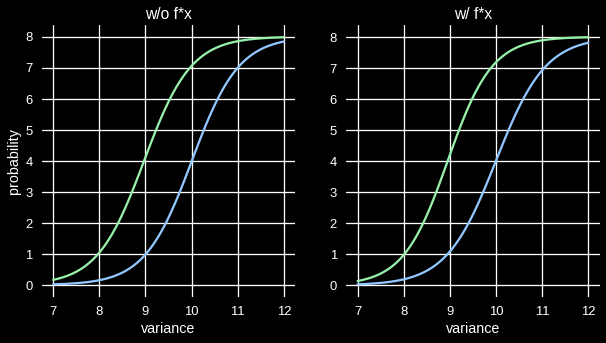

In [45]:
x = np.linspace(-6.0, 6.0, 100)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
x = np.linspace(7.0, 12.0, 100)
z1 = b0 + b1 * x + b2 * 0
plt.plot(x, 1 / (1 + np.exp(-z1)) * 8)
z1 = b0 + b1 * x + b2 * 1
plt.plot(x, 1 / (1 + np.exp(-z1)) * 8)
plt.xlabel('variance')
plt.ylabel('probability')
plt.title('w/o f*x')
plt.legend()
plt.subplot(1, 2, 2)
x = np.linspace(7.0, 12.0, 100)
z1 = fit.params[0] + fit.params[1] * x + fit.params[2] * 0 + fit.params[3] * x * 0
plt.plot(x, 1 / (1 + np.exp(-z1)) * 8)
z1 = fit.params[0] + fit.params[1] * x + fit.params[2] * 0 + fit.params[3] * x * 1
plt.plot(x, 1 / (1 + np.exp(-z1)) * 8)
plt.xlabel('variance')
plt.title('w/ f*x')
plt.legend()

## 6.6 割算値の統計モデリングはやめよう

In [48]:
df = pd.read_csv('data4b.csv')

In [51]:
df.head()

,y,x,A
0,57,0.68,10.3
1,64,0.27,15.6
2,49,0.46,10.0
3,64,0.45,14.9
4,82,0.74,14.0


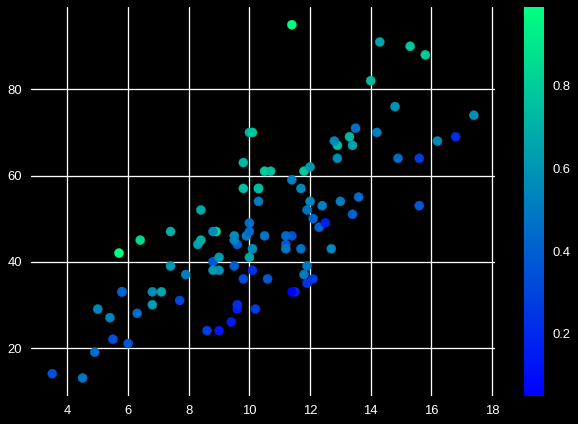

In [73]:
plt.scatter(df['A'], df['y'], c = df['x'], cmap='winter')
plt.colorbar()

In [54]:
df['Intercept'] = 1

In [55]:
df.head()

,y,x,A,Intercept
0,57,0.68,10.3,1
1,64,0.27,15.6,1
2,49,0.46,10.0,1
3,64,0.45,14.9,1
4,82,0.74,14.0,1


In [81]:
glm = sm.GLM(endog=df['y'], exog=df[['Intercept', 'x']], offset=np.log(df['A']), family=sm.families.Poisson())
fit = glm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -323.17
Date:                Fri, 21 Sep 2018   Deviance:                       81.608
Time:                        20:34:42   Pearson chi2:                     81.5
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9731      0.045     21.600      0.000       0.885       1.061
x              1.0383      0.078     13.364      0.000       0.886       1.191
==============================================================================
"""

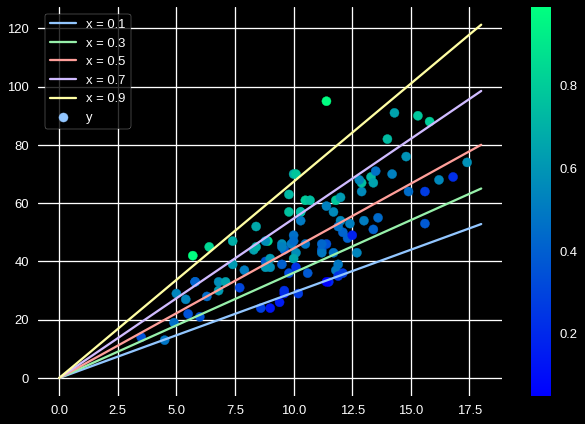

In [87]:
A = np.linspace(0.0, 18.0, 100)
x_list = [0.1, 0.3, 0.5, 0.7, 0.9]
plt.scatter(df['A'], df['y'], c = df['x'], cmap='winter')
plt.colorbar()
for x in x_list:
    plt.plot(A, A * np.exp(fit.params[0] + fit.params[1] * x), label='x = {}'.format(x))
    plt.legend(facecolor='black', frameon=True)